In [103]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [104]:
train = pd.read_csv('titanic_train.csv')

In [105]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [106]:
train.isnull().value_counts()

PassengerId  Survived  Pclass  Name   Sex    Age    SibSp  Parch  Ticket  Fare   Cabin  Embarked
False        False     False   False  False  False  False  False  False   False  True   False       529
                                                                                 False  False       183
                                             True   False  False  False   False  True   False       158
                                                                                 False  False        19
                                             False  False  False  False   False  False  True          2
Name: count, dtype: int64

<Axes: >

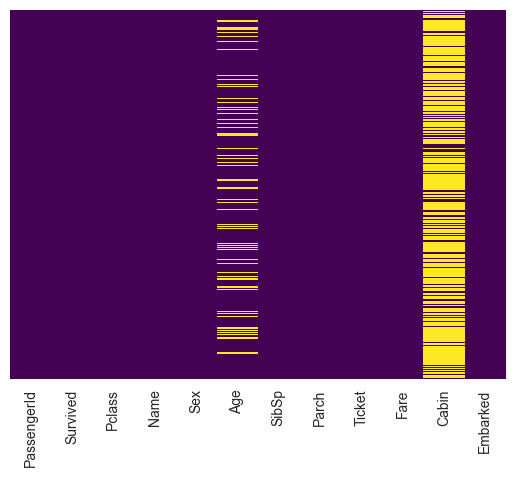

In [107]:
#Yellow marks means missing values in the dataset.
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [108]:
sns.set_style('whitegrid')

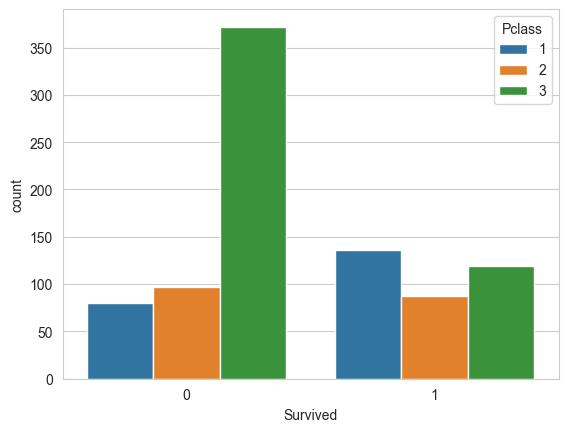

In [109]:
sns.countplot(x='Survived', hue='Pclass', data= train)
plt.show()

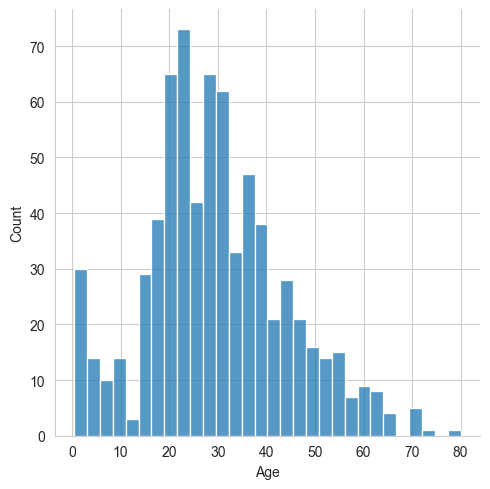

In [110]:
sns.displot(train['Age'], bins=30, kde=False)

<Axes: ylabel='Frequency'>

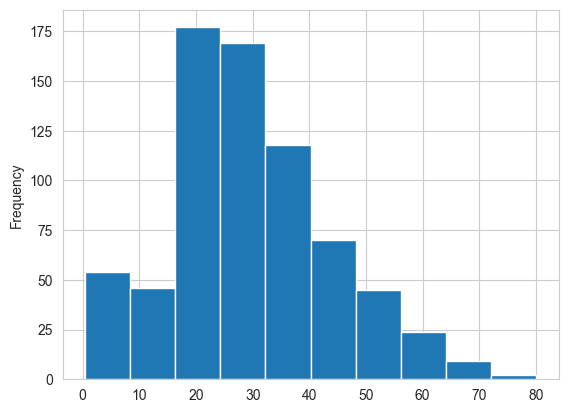

In [111]:
train['Age'].plot.hist()

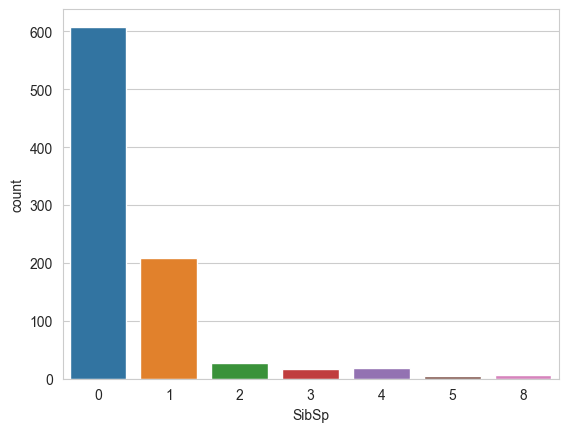

In [112]:
sns.countplot(x='SibSp', data=train)
plt.show()

In [113]:
import cufflinks as cf

In [114]:
cf.go_offline()

In [115]:
train['Age'].iplot(kind='hist', bins=50)

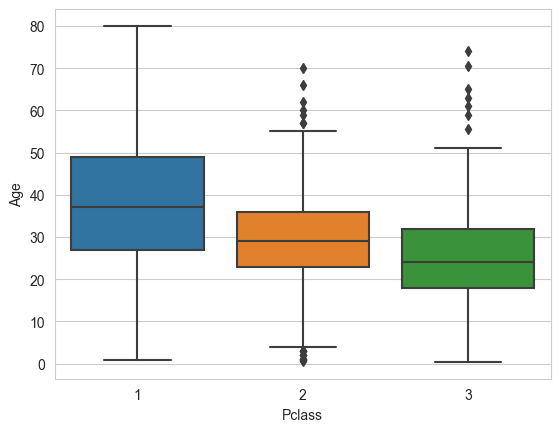

In [116]:
sns.boxplot(x='Pclass', y='Age', data= train)
plt.show()

In [117]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else: 
            return 24
    else:
        return Age 

In [118]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

In [119]:
train.drop('Cabin', axis=1,inplace=True)

get_dummies

In [120]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [121]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [122]:
embark

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True
...,...,...
886,False,True
887,False,True
888,False,True
889,False,False


pd.concat to conect sets 

In [123]:
train = pd.concat([train,sex,embark], axis=1)
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


Drop columns that are not needed for future analysis

In [125]:
train.drop(['PassengerId','Name', 'Ticket', 'Sex', 'Embarked', 'Ticket'], axis=1, inplace=True)

In [126]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


Pclass is category,first algorithm will be with that category and second with pd.get_dummies to look for differences

In [130]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [132]:
from sklearn.model_selection import train_test_split

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 101)

In [135]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (623, 8) (623,)
Test set: (268, 8) (268,)


In [136]:
from sklearn.linear_model import LogisticRegression

In [137]:
log = LogisticRegression()


In [138]:
log.fit(X_train,y_train)

/Users/bartlomiejszafran/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [144]:
pred = log.predict(X_test)
pred

(268,)

In [141]:
from sklearn.metrics import classification_report

In [142]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.78      0.86      0.82       154
           1       0.78      0.67      0.72       114

    accuracy                           0.78       268
   macro avg       0.78      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

